IMPORTS

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Zufällige Daten
points_size = 100
theta_0_random = 2
theta_1_random = 3

# Trainings Daten und Iterationen
iterationen = 100
theta_0 = 0
theta_1 = 0

------------------ Aufgabe - 1 ------------------

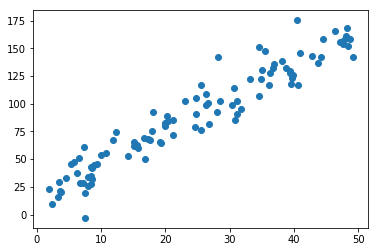

In [3]:
# x = random
x = np.random.uniform(0, 50, points_size) 

# y = b + a*x

# b = random + Rauschen
b = (theta_0_random + np.random.normal(0, 10, points_size))

# ax = random * x + Rauschen
ax = (theta_1_random * (x + np.random.uniform(0, 10, points_size)))

y = b + ax

plt.scatter(x, y)
plt.show()

------------------ Aufgabe - 2 ------------------

In [4]:
def linear_hypothesis(theta_0, theta_1):
    def h(x):
        y = theta_0 + theta_1*x
        return y
    return h

------------------ Aufgabe - 3 ------------------

In [5]:
def kostenfunktion(hypothesis, x, y):
    def j(theta_0, theta_1):
        hypothesis = linear_hypothesis(theta_0, theta_1)
        cost = 1/(2*len(x))*((hypothesis(x) - y)**2).sum()
        return cost
    return j

------------------ Aufgabe - 4 ------------------

Text(0.5,1,'Kostenfunktion')

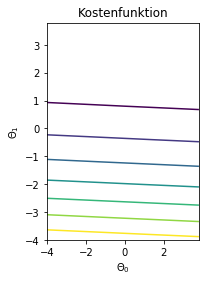

In [6]:
ran = 4.
a = theta_0
b = theta_1

t0 = np.arange(a - ran, a + ran, ran * 0.05)
t1 = np.arange(b - ran, b + ran, ran * 0.05)

C = np.zeros([len(t0),len(t1)])
c = kostenfunktion(linear_hypothesis, x, y)

for i, t_0 in enumerate(t0):
    for j, t_1 in enumerate(t1):
        C[j][i] = c(t_0, t_1)
T0, T1 = np.meshgrid(t0, t1)

plt.subplot(121)
plt.contour(T0, T1, C)
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.title('Kostenfunktion')

------------------ Aufgabe - 5 ------------------

In [7]:
def compute_new_theta (x,y,theta_0,theta_1,alpha):

    temp0 = 1/len(x) * (theta_0 + theta_1 * x - y).sum() # abgeleitet
    temp1 = 1/len(x) * ((theta_0 + theta_1 * x - y) * x).sum() # abgeleitet

    theta_0 -= alpha*  temp0
    theta_1 -= alpha*  temp1

    return theta_0, theta_1

------------------ Aufgabe - 5, 6, 7 ------------------

In [8]:
def gradientenabstiegsverfahren(theta_0, theta_1, lernrate, color):
    kosten = np.array([])
    for i in range (iterationen):
        theta_0, theta_1 = compute_new_theta (x, y, theta_0, theta_1, lernrate)
        hypothesis = linear_hypothesis(theta_0,theta_1)
        j = kostenfunktion(hypothesis, x, y)
        j_value = j(theta_0, theta_1)
        kosten = np.append(kosten, j_value, None)
        plt.plot([0,50],[hypothesis(0),hypothesis(50)], color="g")
    
    return np.array([kosten, hypothesis, x, y])

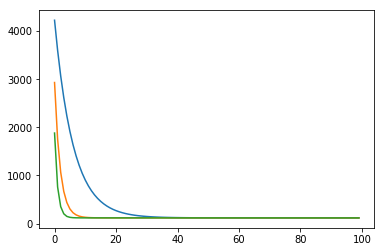

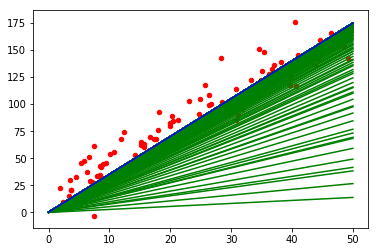

In [9]:
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ax2 = f2.add_subplot(111)

gradient_1 = gradientenabstiegsverfahren(theta_0, theta_1, 0.0001, "r")
ax1.plot(gradient_1[0])
ax2.plot([0,50],[gradient_1[1](0),gradient_1[1](50)], color="r")

gradient_2 = gradientenabstiegsverfahren(theta_0, theta_1, 0.0003, "g")
ax1.plot(gradient_2[0])
ax2.plot([0,50],[gradient_2[1](0),gradient_2[1](50)], color="g")

gradient_3 = gradientenabstiegsverfahren(theta_0, theta_1, 0.0005, "b")
ax1.plot(gradient_3[0])
ax2.plot([0,50],[gradient_3[1](0),gradient_3[1](50)], color="b")

ax2.scatter(gradient_1[2], gradient_1[3], color='r', s=20)